In [65]:
import pandas as pd
import datetime 
import psycopg2
from sqlalchemy import create_engine
from time import time
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('C:\\Users\\OLX - Lucas Dresi\\Documents\\RatingsAndReviews\\conversations_time_response.csv')

In [121]:
df = df.sort_values(['conversation_nk' , 'acounter'])

In [122]:
df.head()

,conversation_nk,acounter,time_sent_utc
0,000092e3a4b0d3c6c5675e4e72b6f9ea44a77403,2,2019-03-15 15:01:55.000000
27306,000092e3a4b0d3c6c5675e4e72b6f9ea44a77403,3,2019-03-19 01:41:27.000000
24600,00013e6f2a0092c799415a3112cbe1e6e72ed0ab,2,2019-03-08 08:24:38.000000
13653,00013e6f2a0092c799415a3112cbe1e6e72ed0ab,3,2019-03-08 08:24:57.000000
12669,00013e6f2a0092c799415a3112cbe1e6e72ed0ab,4,2019-03-08 08:25:03.000000


In [123]:
df['time_sent_utc'] = pd.to_datetime(df['time_sent_utc'])

In [124]:
import datetime as dt
df['minutos'] = df.groupby(['conversation_nk'])['time_sent_utc'].shift()
df['tiempo_de_respuesta'] = (df['time_sent_utc'] - df['minutos'])
df['tiempo_de_respuesta_en_minutos'] = df['tiempo_de_respuesta'].astype('timedelta64[h]')
#df['tiempo_de_respuesta_en_horas'] = (df['tiempo_de_respuesta_en_minutos'] / 60).round()
#df['tiempo_de_respuesta'].seconds

In [125]:
df.head()

,conversation_nk,acounter,time_sent_utc,minutos,tiempo_de_respuesta,tiempo_de_respuesta_en_minutos
0,000092e3a4b0d3c6c5675e4e72b6f9ea44a77403,2,2019-03-15 15:01:55,NaT,NaT,NaN
27306,000092e3a4b0d3c6c5675e4e72b6f9ea44a77403,3,2019-03-19 01:41:27,2019-03-15 15:01:55,3 days 10:39:32,82.0
24600,00013e6f2a0092c799415a3112cbe1e6e72ed0ab,2,2019-03-08 08:24:38,NaT,NaT,NaN
13653,00013e6f2a0092c799415a3112cbe1e6e72ed0ab,3,2019-03-08 08:24:57,2019-03-08 08:24:38,0 days 00:00:19,0.0
12669,00013e6f2a0092c799415a3112cbe1e6e72ed0ab,4,2019-03-08 08:25:03,2019-03-08 08:24:57,0 days 00:00:06,0.0


In [109]:
df['tiempo_de_respuesta'].value_counts().to_frame().to_csv('C:\\Users\\OLX - Lucas Dresi\\Documents\\RatingsAndReviews\\tiempo_de_respuesta.csv')

In [127]:
#a = df['tiempo_de_respuesta'].value_counts().to_frame()
#a.sort_values(['tiempo_de_respuesta'] , ascending = False)
df1 = df[df['tiempo_de_respuesta_en_minutos'].notnull()]

In [132]:
#df1['tiempo_de_respuesta_en_minutos'].value_counts()

Text(0.5, 1.0, 'Time to response')

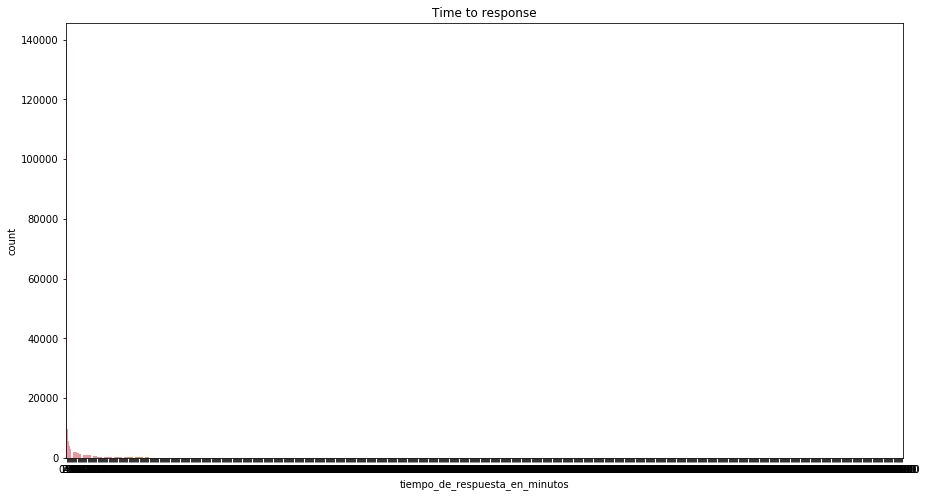

In [130]:
fig , ax = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="tiempo_de_respuesta_en_minutos", data=df1)
ax.set_title('Time to response')

In [131]:
df.to_csv('C:\\Users\\OLX - Lucas Dresi\\Documents\\RatingsAndReviews\\tiempo_de_respuesta_df.csv')

In [ ]:
df1[df1['conversation_nk'] == '0277c4d0beb1f491757fe2b67e025daf5ef4993c']